# Importation et inspection des données

In [20]:
#changement de dossier
import os
os.chdir("C:/Users/ricco/Desktop/demo")

#chargement des données
import pandas
jobrate = pandas.read_excel("jobrate.xlsx")
jobrate.head()

,Communication_Skills,Problem_Solving,Learning_Ability,Judgement_under_Pressure,Observational_Skills,Willingness_to_Confront_Problems,Interest_in_People,Interpersonal_Sensitivity,Desire_for_Self_Improvement,Appearance,Dependability,Physical_Ability,Integrity,Overall_Rating
0,2,6,8,3,8,8,5,3,8,7,9,8,6,7
1,7,4,7,5,8,8,7,6,8,5,7,6,6,7
2,5,6,7,5,7,8,6,3,7,7,5,8,7,5
3,6,7,8,6,9,7,7,7,9,8,8,9,9,7
4,9,9,9,9,7,7,9,8,8,7,8,8,8,8


In [21]:
#information sur les données
jobrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Communication_Skills              103 non-null    int64
 1   Problem_Solving                   103 non-null    int64
 2   Learning_Ability                  103 non-null    int64
 3   Judgement_under_Pressure          103 non-null    int64
 4   Observational_Skills              103 non-null    int64
 5   Willingness_to_Confront_Problems  103 non-null    int64
 6   Interest_in_People                103 non-null    int64
 7   Interpersonal_Sensitivity         103 non-null    int64
 8   Desire_for_Self_Improvement       103 non-null    int64
 9   Appearance                        103 non-null    int64
 10  Dependability                     103 non-null    int64
 11  Physical_Ability                  103 non-null    int64
 12  Integrity                         10

In [22]:
#variables actives
X = jobrate[jobrate.columns[:-1]]
print(X.columns)

Index(['Communication_Skills', 'Problem_Solving', 'Learning_Ability',
       'Judgement_under_Pressure', 'Observational_Skills',
       'Willingness_to_Confront_Problems', 'Interest_in_People',
       'Interpersonal_Sensitivity', 'Desire_for_Self_Improvement',
       'Appearance', 'Dependability', 'Physical_Ability', 'Integrity'],
      dtype='object')


In [23]:
#matrice des corrélations
R = X.corr()
print(R)

                                  Communication_Skills  Problem_Solving  \
Communication_Skills                          1.000000         0.628035   
Problem_Solving                               0.628035         1.000000   
Learning_Ability                              0.554550         0.569010   
Judgement_under_Pressure                      0.553767         0.619508   
Observational_Skills                          0.538073         0.428397   
Willingness_to_Confront_Problems              0.526495         0.501478   
Interest_in_People                            0.439102         0.397212   
Interpersonal_Sensitivity                     0.503019         0.439777   
Desire_for_Self_Improvement                   0.564244         0.409005   
Appearance                                    0.491275         0.387283   
Dependability                                 0.547073         0.454569   
Physical_Ability                              0.219193         0.320063   
Integrity                

<AxesSubplot: >

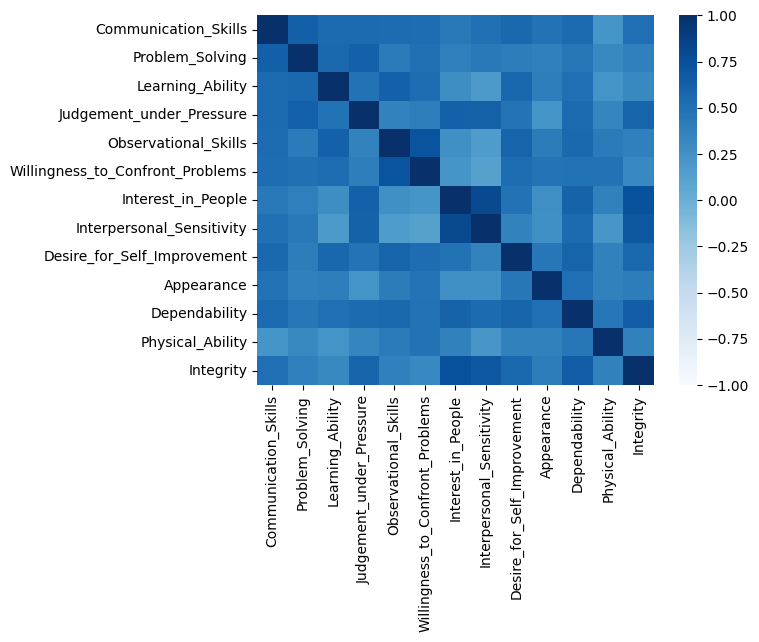

In [24]:
#représentation graphique - heatmap
import seaborn as sns
sns.heatmap(R,vmin=-1,vmax=+1,cmap='Blues')

<AxesSubplot: >

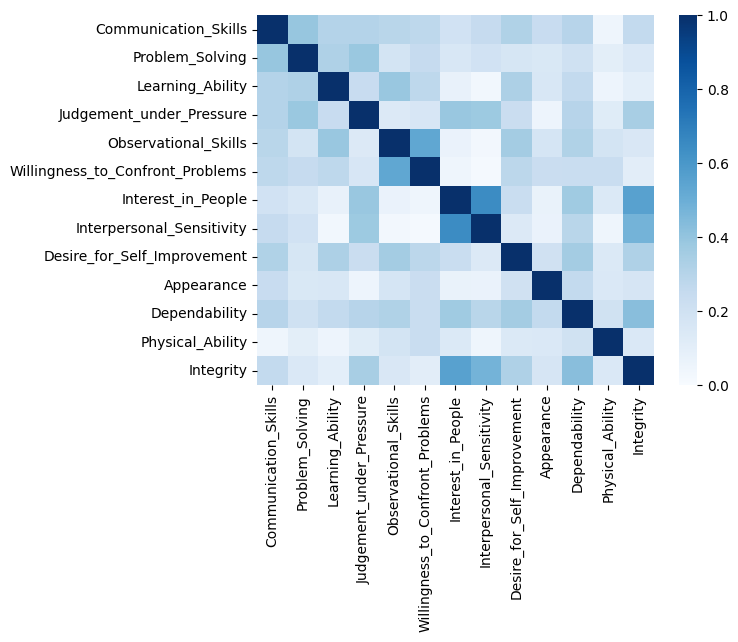

In [25]:
#ou avec le carré des corrélations
#la valeur min devient 0 dans ce cas
sns.heatmap(R**2,vmin=0,vmax=+1,cmap='Blues')

# CAH sur les variables

In [26]:
import numpy
D = numpy.sqrt(1-R**2)
print(D.iloc[:3,:3])

                      Communication_Skills  Problem_Solving  Learning_Ability
Communication_Skills              0.000000         0.778185           0.83215
Problem_Solving                   0.778185         0.000000           0.82233
Learning_Ability                  0.832150         0.822330           0.00000


In [27]:
#préparation pour la CAH de scipy
#vectoriser la matrice des distances
from scipy.spatial.distance import squareform
VD = squareform(D)
print(VD)

[0.77818523 0.83215007 0.83267178 0.84289804 0.85017808 0.89843705
 0.86427518 0.82560814 0.87100447 0.83708488 0.97568158 0.8613188
 0.82233043 0.78499017 0.90359063 0.86517037 0.91772702 0.89810686
 0.91253221 0.92196106 0.89071177 0.94739634 0.92309005 0.87219097
 0.78223456 0.85140174 0.96187211 0.98264578 0.8190852  0.91703795
 0.85960042 0.97392625 0.94935047 0.92770778 0.91635538 0.78250602
 0.78980271 0.87583841 0.97398669 0.83704371 0.93763126 0.80862658
 0.68349431 0.96516709 0.9862157  0.80115068 0.90858111 0.82675831
 0.90407921 0.92057396 0.97474855 0.99163318 0.84754664 0.87591723
 0.87338953 0.87327121 0.94535553 0.59307603 0.87409835 0.96345514
 0.79439041 0.92629042 0.66686892 0.92852812 0.9656013  0.84117373
 0.97590127 0.7219     0.89431316 0.80140227 0.92692439 0.82414385
 0.86080325 0.92416038 0.91048572 0.8949733  0.75680154 0.9245921 ]


In [28]:
#CAH - Ward
from scipy.cluster.hierarchy import ward
cah = ward(VD)
print(cah)

[[ 6.          7.          0.59307603  2.        ]
 [ 4.          5.          0.68349431  2.        ]
 [12.         13.          0.72571077  3.        ]
 [ 0.          1.          0.77818523  2.        ]
 [ 8.         10.          0.80140227  2.        ]
 [ 3.         16.          0.81925402  3.        ]
 [ 2.         17.          0.85193531  3.        ]
 [14.         19.          0.91093491  5.        ]
 [ 9.         11.          0.92416038  2.        ]
 [20.         21.          0.98022744  7.        ]
 [18.         22.          1.03939101 10.        ]
 [15.         23.          1.23922901 13.        ]]


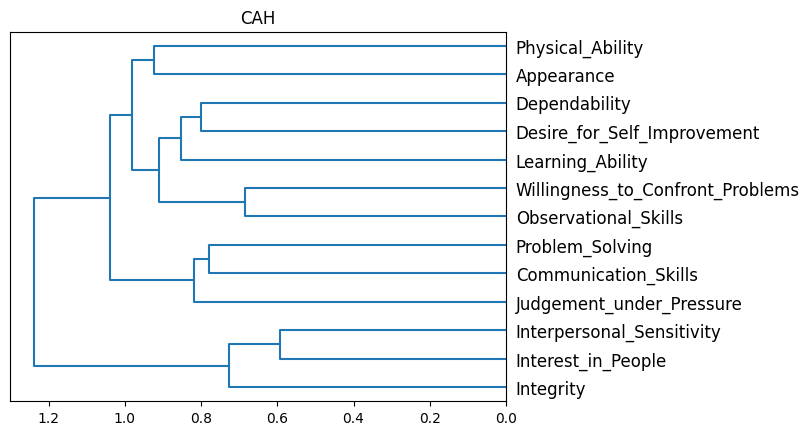

In [29]:
#dendrogramme
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
plt.title("CAH")
dendrogram(cah,labels=X.columns,orientation='left',color_threshold=0)
plt.show()

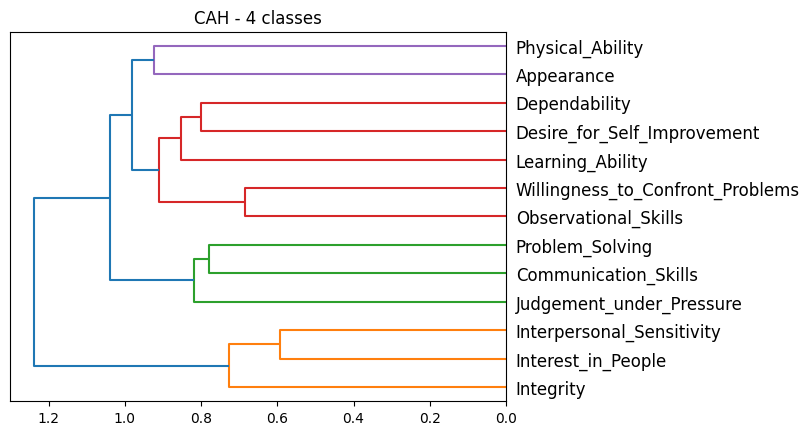

In [30]:
#matérialisation de 4 classes
plt.title("CAH - 4 classes")
dendrogram(cah,labels=X.columns,orientation='left',color_threshold=0.95)
plt.show()

In [31]:
#découpage effectif en 4 classes
from scipy.cluster.hierarchy import fcluster
groupes = fcluster(cah,t=0.95,criterion='distance')
print(groupes)

[2 2 3 2 3 3 1 1 3 4 3 4 1]


In [32]:
#comptage
print(numpy.unique(groupes,return_counts=True))

(array([1, 2, 3, 4], dtype=int32), array([3, 3, 5, 2], dtype=int64))


In [33]:
#liste des variables pour le groupe 1
print(X.columns[groupes == 1])

Index(['Interest_in_People', 'Interpersonal_Sensitivity', 'Integrity'], dtype='object')


In [34]:
#affichage des groupes
for g in numpy.unique(groupes):
    print(g," : ",X.columns[groupes == g])

1  :  Index(['Interest_in_People', 'Interpersonal_Sensitivity', 'Integrity'], dtype='object')
2  :  Index(['Communication_Skills', 'Problem_Solving', 'Judgement_under_Pressure'], dtype='object')
3  :  Index(['Learning_Ability', 'Observational_Skills',
       'Willingness_to_Confront_Problems', 'Desire_for_Self_Improvement',
       'Dependability'],
      dtype='object')
4  :  Index(['Appearance', 'Physical_Ability'], dtype='object')


# Traitement de la variable supplémentaire (overral)

In [35]:
#corrélation avec chaque variable
print(X.corrwith(jobrate.Overall_Rating))

Communication_Skills                0.680250
Problem_Solving                     0.577254
Learning_Ability                    0.592385
Judgement_under_Pressure            0.655048
Observational_Skills                0.584425
Willingness_to_Confront_Problems    0.589032
Interest_in_People                  0.613343
Interpersonal_Sensitivity           0.577246
Desire_for_Self_Improvement         0.667191
Appearance                          0.568722
Dependability                       0.769633
Physical_Ability                    0.438495
Integrity                           0.671647
dtype: float64


In [36]:
#dataset pour le groupe 1
X[X.columns[groupes == 1]].head()

,Interest_in_People,Interpersonal_Sensitivity,Integrity
0,5,3,6
1,7,6,6
2,6,3,7
3,7,7,9
4,9,8,8


In [37]:
#corrélations des variables du groupe 1 avec "overall"
print(X[X.columns[groupes == 1]].corrwith(jobrate.Overall_Rating))

Interest_in_People           0.613343
Interpersonal_Sensitivity    0.577246
Integrity                    0.671647
dtype: float64


In [38]:
#moyenne des carrés des corrélations avec les groupes
for g in numpy.unique(groupes):
    print(g," : ",numpy.mean(X[X.columns[groupes==g]].corrwith(jobrate.Overall_Rating)**2))

1  :  0.38683756104936434
2  :  0.40834988274785666
3  :  0.4153820426907955
4  :  0.25786162385199723
